In [1]:
import os
from PIL import Image
import numpy as np

In [2]:

os.listdir()

['.ipynb_checkpoints',
 'food-iden-10-Copy1.ipynb',
 'food-iden-10.ipynb',
 'images',
 'images - Copy',
 'images-samp',
 'inception_food_first_10_food.h5']

In [3]:
base_dir="./images"

In [4]:
foods=os.listdir('./images/')

In [5]:
len(foods)

101

import os
import numpy as np
from PIL import Image
from tqdm import tqdm

data = []
labels = []

c = 0
image_size = (224, 224)  # Desired size for images

# Iterate through each food category
for food in foods:
    # Process each image in the food category
    for foodimage in tqdm(os.listdir(f'./images/{food}')):
        img_path = os.path.join(f'./images/{food}/{foodimage}')
        img = Image.open(img_path)
        
      
        img_resized = img.resize(image_size)
        
        # Convert image to NumPy array
        img_array = np.array(img_resized)
        
        # Check if the shape is correct
        if img_array.shape == (224, 224, 3):
            data.append(img_array)
            labels.append(food)
        else:
            print(f"Skipped image {foodimage} due to incorrect shape: {img_array.shape}")
    
    c += 1
    print(f"{c}/101 done")




x= np.array(data)
x = x.astype("float32") / 255
y=np.array(encoded_labels)

In [18]:
# len(data)

In [19]:
# len(labels)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1  # 10% of data will be used for validation
)


train_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=True,
    subset='training'  
)


test_data = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=100,
    class_mode='categorical',
    shuffle=False,
    subset='validation'  
)

Found 90900 images belonging to 101 classes.
Found 10100 images belonging to 101 classes.


In [7]:
print(f"Number of training samples: {train_data.samples}")
print(f"Number of validation samples: {test_data.samples}")


Number of training samples: 90900
Number of validation samples: 10100


In [8]:
print("\nThe 101 Classes numbers:\n",np.unique(train_data.labels),"\n",
       "_"*30,
       "\nThe 101 classes names:\n",train_data.class_indices,
      sep="")


The 101 Classes numbers:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
______________________________
The 101 classes names:
{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cake

In [9]:

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from keras.layers import Input

# Parameters
batch_size = 100
num_classes = 101
epochs = 10


base_model = InceptionV3(weights='imagenet', include_top=False,input_tensor=Input(shape=(224, 224, 3)))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



In [10]:




# Train the model
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=epochs,
    validation_data=test_data,
    validation_steps=len(test_data)
)



Epoch 1/10


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


909/909 ━━━━━━━━━━━━━━━━━━━━ 2699s 3s/step - accuracy: 0.3412 - loss: 2.8075 - val_accuracy: 0.4774 - val_loss: 2.0463
Epoch 2/10


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


909/909 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 3680s 4s/step - accuracy: 0.5085 - loss: 1.9103 - val_accuracy: 0.4957 - val_loss: 1.9897
Epoch 4/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 2507s 3s/step - accuracy: 0.5449 - loss: 1.7435 - val_accuracy: 0.5146 - val_loss: 1.9227
Epoch 6/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 2575s 3s/step - accuracy: 0.5737 - loss: 1.6220 - val_accuracy: 0.5109 - val_loss: 1.9502
Epoch 8/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 2534s 3s/step - accuracy: 0.5937 - loss: 1.5178 - val_accuracy: 0.5093 - val_loss: 1.9634
Epoch 10/10
909/909 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [12]:
# Save the trained model
model.save('inception_food101.h5')



In [13]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(test_data, steps=len(test_data))
print(f'Validation accuracy: {val_acc:.4f}')

101/101 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.4791 - loss: 2.1141
Validation accuracy: 0.5093


101/101 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step


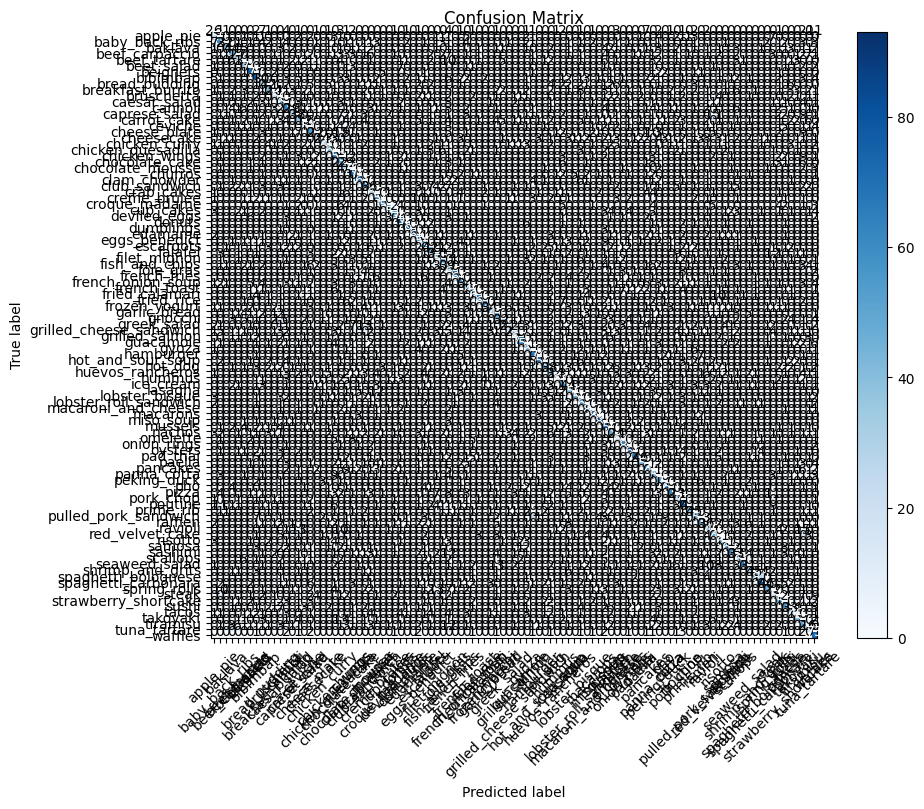

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools 
# Get true labels
true_labels = test_data.classes

# Predict probabilities for each class
predictions = model.predict(test_data, steps=len(test_data))

# Get predicted labels
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)


# Function to plot confusion matrix




In [26]:
import pandas as pd
import seaborn as sns
cm=pd.crosstab(true_labels,predicted_labels,rownames=['Actual'], colnames=['Predicted'])

Heatmap



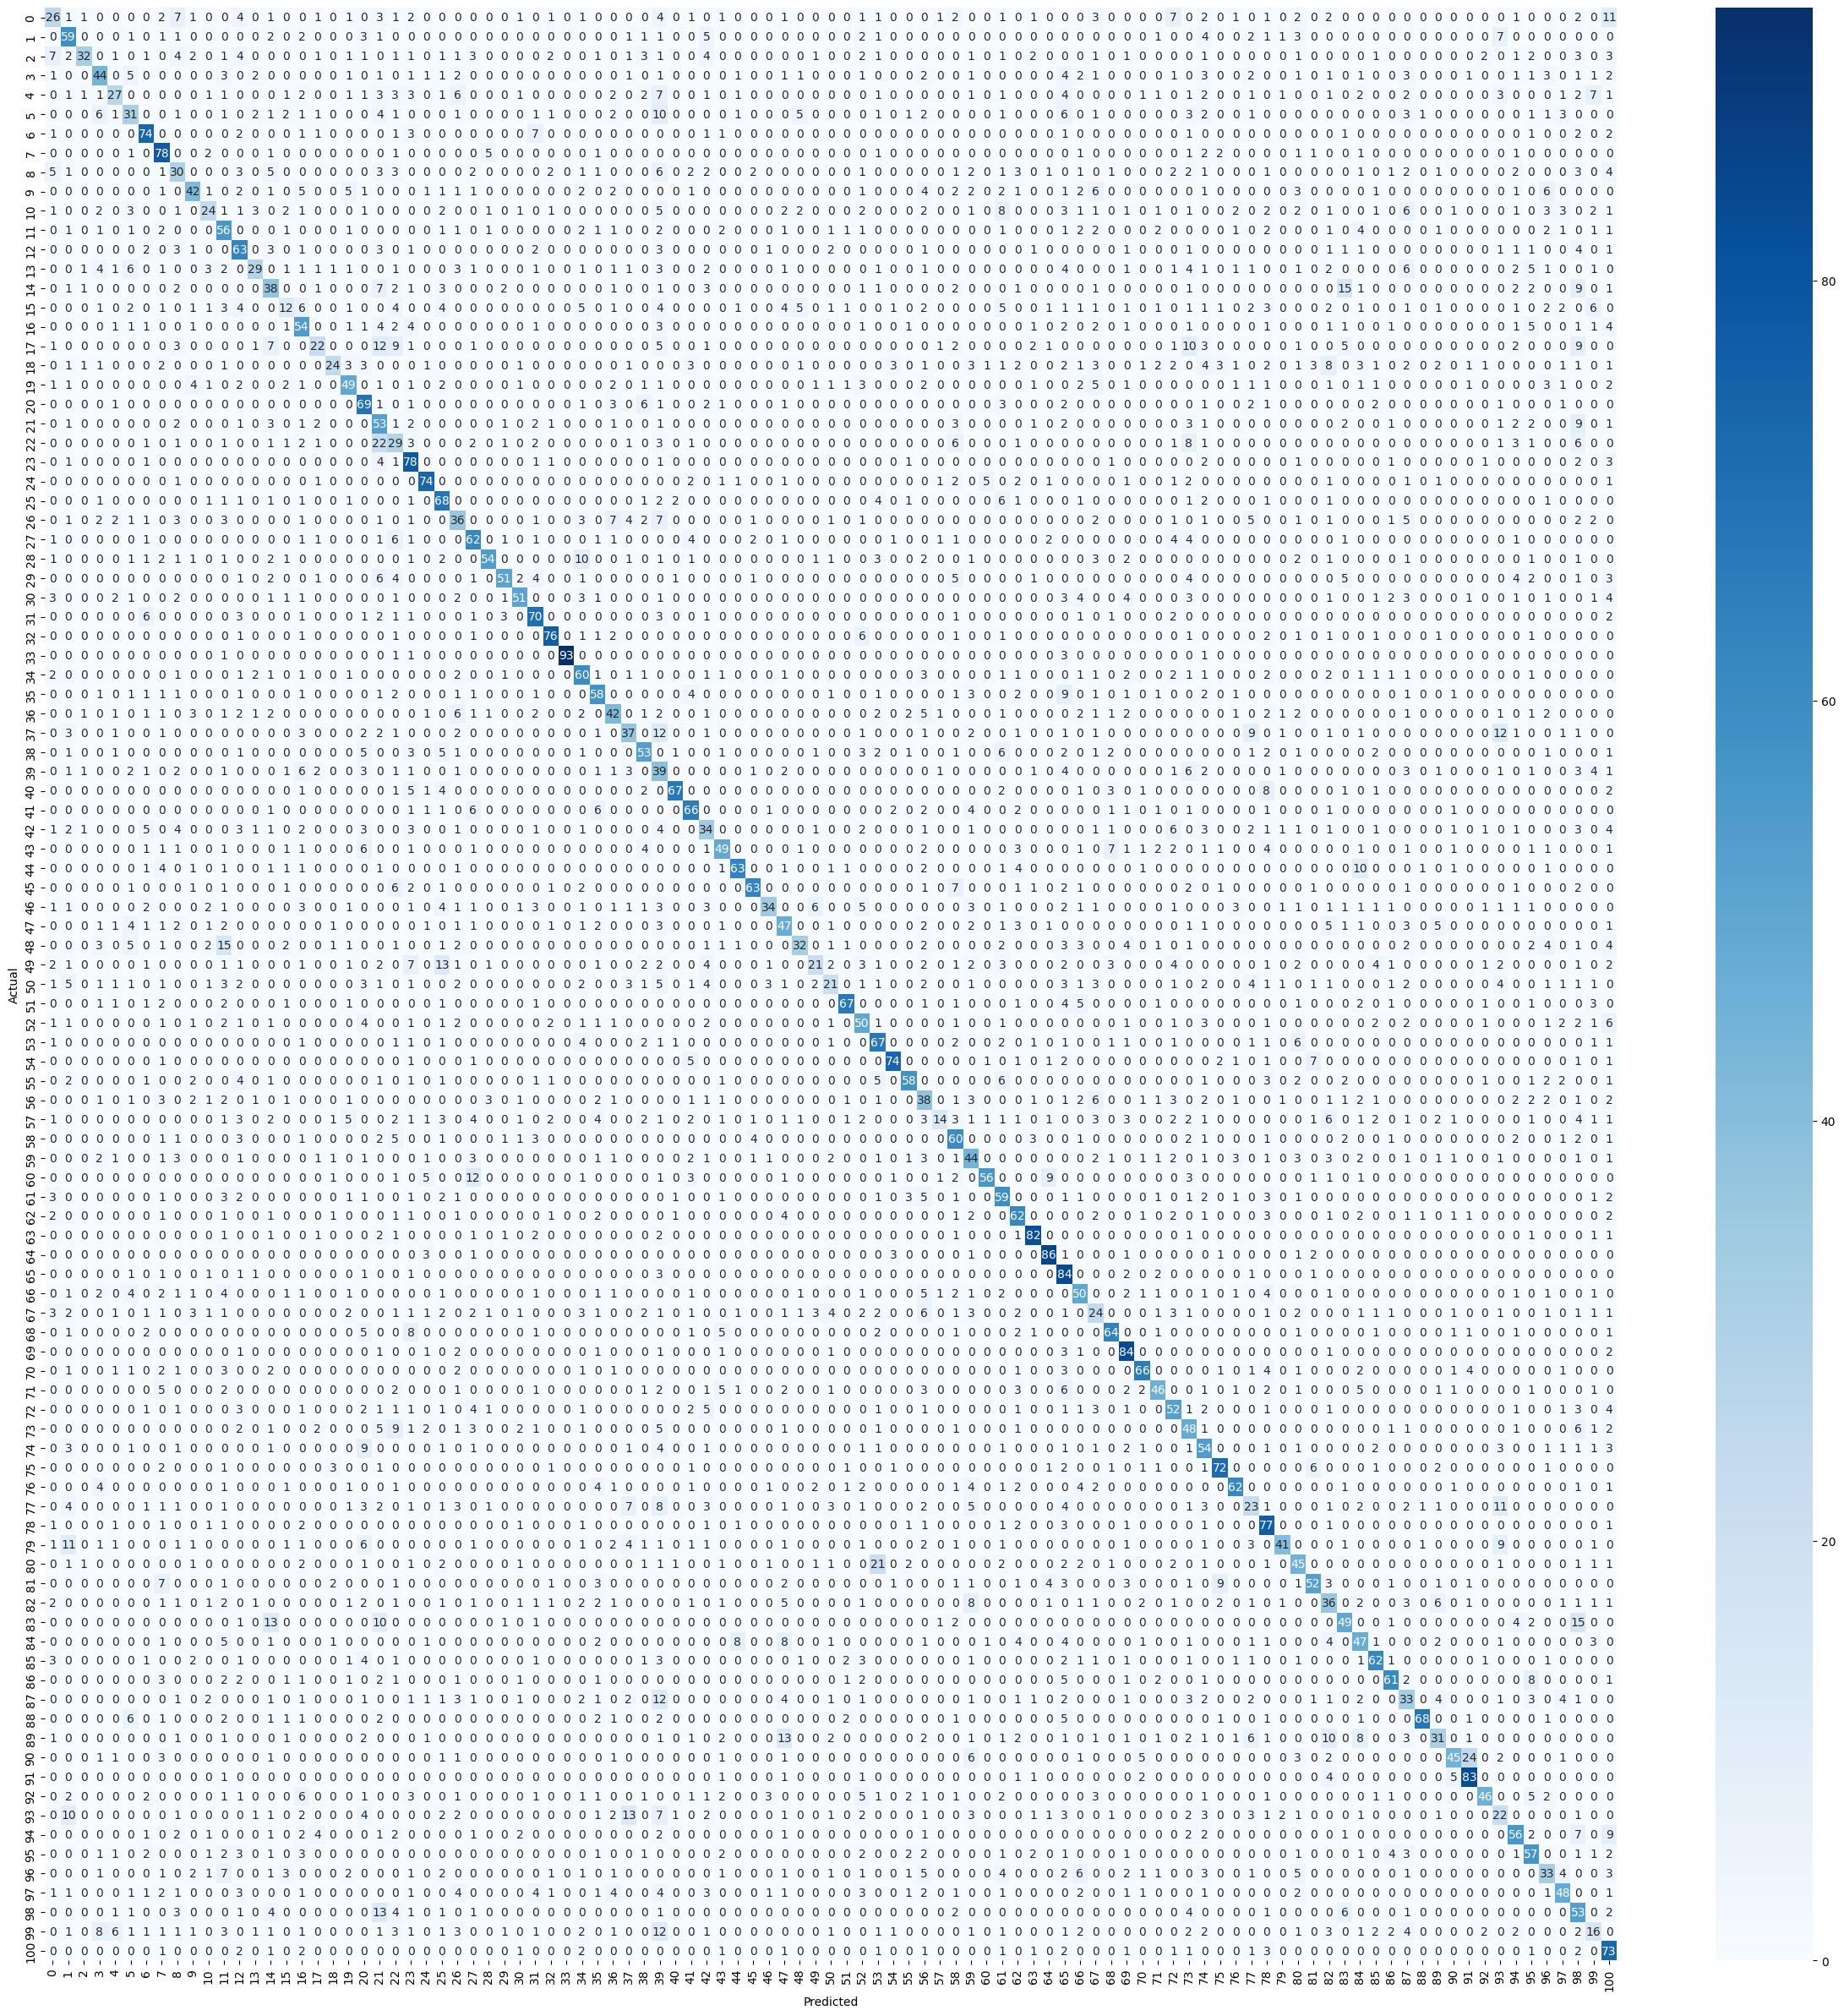

In [27]:
print("Heatmap\n")
plt.figure(figsize=(30, 30))
sns.heatmap(cm,annot=True, cmap='Blues')
plt.show()

In [50]:
from tensorflow.keras.preprocessing import image
classes=list(train_data.class_indices.keys())
def getPred(image_path,classes,model):
    img = image.load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    
    ans=np.argmax(model.predict(img_array), axis=1)[0]
    
    
    print(classes[ans])


In [51]:
classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [52]:
model.custom_classes= classes

In [53]:
model.custom_classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
bread_pudding


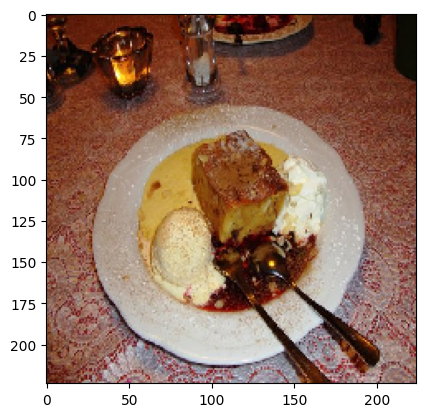

In [54]:
img=getPred('./images/bread_pudding/1005036.jpg',model.custom_classes,model)

In [55]:

# Save the trained model
model.save('inception_food101.h5')


In [56]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('./inception_food101.h5')

# Now you can use loaded_model to make predictions, evaluate, etc.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
samosa


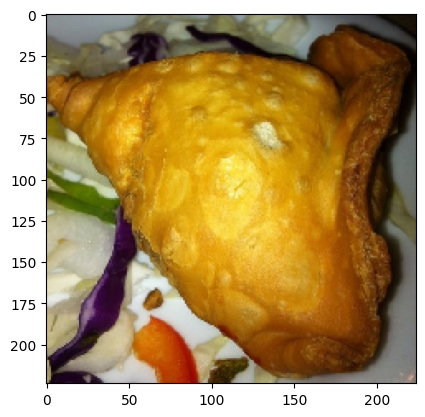

In [57]:
img=getPred('./images/samosa/1011601.jpg',model.custom_classes,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
pizza


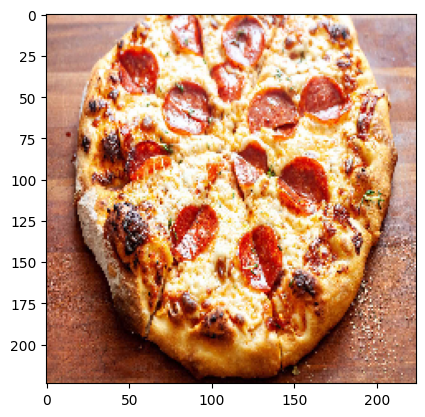

In [59]:
getPred('./manual_test1.jpg',model.custom_classes,model)

In [ ]:
getPred('./images-samp/bread_pudding/1005036.jpg',model.custom_classes,model)